In [5]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

import datasets

In [ ]:
df_lesson_page = datasets.enter.lesson_page()
df_complete_lesson = datasets.complete.lesson()
df_click_lesson_comment = datasets.click.lesson_page_related_comment_box()


c:\Users\soom0\OneDrive\바탕 화면\정수민\코드잇\스프린트 미션\프로젝트 2\intermediate_project\datasets.py:132: DtypeWarning: Columns (9,13,15) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(file_path)


In [24]:
# 로그 시간 date time 형식으로 변환
df_lesson_page['client_event_time'] = pd.to_datetime(df_lesson_page['client_event_time'])
df_complete_lesson['client_event_time'] = pd.to_datetime(df_complete_lesson['client_event_time'])
df_click_lesson_comment['client_event_time'] = pd.to_datetime(df_click_lesson_comment['client_event_time'])

In [ ]:
# # 중복 제거
# df_lesson_page.drop_duplicates(inplace=True)
# df_complete_lesson.drop_duplicates(inplace=True)
# df_click_lesson_comment.drop_duplicates(inplace=True)

# # 컬럼 .  _ 으로 변경
# df_lesson_page.columns = df_lesson_page.columns.str.replace('.', '_')
# df_complete_lesson.columns = df_complete_lesson.columns.str.replace('.', '_')
# df_click_lesson_comment.columns = df_click_lesson_comment.columns.str.replace('.', '_')

# # 날짜 정리
# df_lesson_page = df_lesson_page[df_lesson_page['client_event_time'].dt.year.isin([2022, 2023])]
# df_complete_lesson = df_complete_lesson[df_complete_lesson['client_event_time'].dt.year.isin([2022, 2023])]
# df_click_lesson_comment = df_click_lesson_comment[df_click_lesson_comment['client_event_time'].dt.year.isin([2022, 2023])]

# # 기초 처리 저장
# df_lesson_page.to_csv('./data/enter.lesson_page.csv',encoding='UTF-8')
# df_complete_lesson.to_csv('./data/complete.lesson.csv',encoding='UTF-8')
# df_click_lesson_comment.to_csv('./data/click.lesson_page_related_question_box.csv',encoding='UTF-8')

In [ ]:
# 데이터 시간 범위 확인
print("df_lesson_page:")
print("Min:", df_lesson_page['client_event_time'].min())
print("Max:", df_lesson_page['client_event_time'].max())

print("\ndf_complete_lesson:")
print("Min:", df_complete_lesson['client_event_time'].min())
print("Max:", df_complete_lesson['client_event_time'].max())

print("\ndf_click_lesson_comment:")
print("Min:", df_click_lesson_comment['client_event_time'].min())
print("Max:", df_click_lesson_comment['client_event_time'].max())

df_lesson_page:
Min: 2022-01-01 00:01:34.047000
Max: 2023-12-31 23:58:48.291000

df_complete_lesson:
Min: 2022-01-01 00:00:01.181000
Max: 2023-12-31 23:59:35.209000

df_click_lesson_comment:
Min: 2022-01-01 00:08:23.144000
Max: 2023-12-31 23:51:45.529000


In [30]:
df_click_lesson_comment.isna().sum()

city                   23461
client_event_time          0
country                14891
device_carrier       1378910
device_family              1
device_type             6334
event_type                 0
language                   0
os_name                    1
os_version               213
platform                   0
user_id                52903
question_id           554146
content_id            554147
lesson_id             554146
dtype: int64

In [31]:
df_click_lesson_comment.shape

(1378910, 15)

In [39]:
# 월별 이용자수 추이 확인
monthly_users_enter_lesson = df_lesson_page.resample('ME', on='client_event_time')['user_id'].nunique()
# 인덱스를 month로, %Y-%m 형태로 변환
monthly_users_enter_lesson.index = monthly_users_enter_lesson.index.strftime('%Y-%m')
monthly_users_enter_lesson.index.name = 'month'
# 결과 출력
print(monthly_users_enter_lesson)

month
2022-01     8338
2022-02     6735
2022-03     8342
2022-04     7589
2022-05     7804
2022-06     8103
2022-07     5466
2022-08     4941
2022-09     4240
2022-10     4555
2022-11     5221
2022-12    10699
2023-01    12583
2023-02     6758
2023-03     5974
2023-04     6097
2023-05     8119
2023-06     9891
2023-07    12077
2023-08    11058
2023-09     8763
2023-10     8839
2023-11    11893
2023-12    11166
Name: user_id, dtype: int64


In [40]:
# 월별 이용자수 추이 확인
monthly_users_complete_lesson = df_complete_lesson.resample('ME', on='client_event_time')['user_id'].nunique()
# 인덱스를 month로, %Y-%m 형태로 변환
monthly_users_complete_lesson.index = monthly_users_complete_lesson.index.strftime('%Y-%m')
monthly_users_complete_lesson.index.name = 'month'
# 결과 출력
print(monthly_users_complete_lesson)

month
2022-01    3910
2022-02    3509
2022-03    3454
2022-04    3011
2022-05    3014
2022-06    2912
2022-07    3090
2022-08    3702
2022-09    3140
2022-10    3376
2022-11    3432
2022-12    3885
2023-01    4439
2023-02    3951
2023-03    3612
2023-04    4110
2023-05    4496
2023-06    5212
2023-07    6363
2023-08    6153
2023-09    5040
2023-10    5104
2023-11    6337
2023-12    6662
Name: user_id, dtype: int64


In [ ]:
# 월별 이용자수 추이 확인
monthly_users_lesson_comment = df_click_lesson_comment.resample('ME', on='client_event_time')['user_id'].nunique()
# 인덱스를 month로, %Y-%m 형태로 변환
monthly_users_lesson_comment.index = monthly_users_lesson_comment.index.strftime('%Y-%m')
monthly_users_lesson_comment.index.name = 'month'

# 결과 출력
print(monthly_users_lesson_comment)

month
2022-01    4580
2022-02    3909
2022-03    4115
2022-04    3601
2022-05    3596
2022-06    3598
2022-07    2974
2022-08    2783
2022-09    2290
2022-10    2451
2022-11    2504
2022-12    2007
2023-01    3424
2023-02    2783
2023-03    2715
2023-04    2627
2023-05    2592
2023-06    2958
2023-07    3521
2023-08    3442
2023-09    2984
2023-10    2838
2023-11    3177
2023-12    3091
Name: user_id, dtype: int64


In [57]:
# 컬럼명 수정
monthly_users_enter_lesson = monthly_users_enter_lesson.reset_index().rename(columns={'user_id':'enter_count'})
monthly_users_complete_lesson = monthly_users_complete_lesson.reset_index().rename(columns={'user_id':'complete_count'})
monthly_users_lesson_comment = monthly_users_lesson_comment.reset_index().rename(columns={'user_id':'comment_count'})


In [59]:
# 데이터프레임 병합
merged_df = pd.merge(monthly_users_enter_lesson, monthly_users_complete_lesson, on='month')
merged_df = pd.merge(merged_df, monthly_users_lesson_comment, on='month')

# 결과 출력
display(merged_df)

,month,enter_count,complete_count,comment_count
0,2022-01,8338,3910,4580
1,2022-02,6735,3509,3909
2,2022-03,8342,3454,4115
3,2022-04,7589,3011,3601
4,2022-05,7804,3014,3596
5,2022-06,8103,2912,3598
6,2022-07,5466,3090,2974
7,2022-08,4941,3702,2783
8,2022-09,4240,3140,2290
9,2022-10,4555,3376,2451


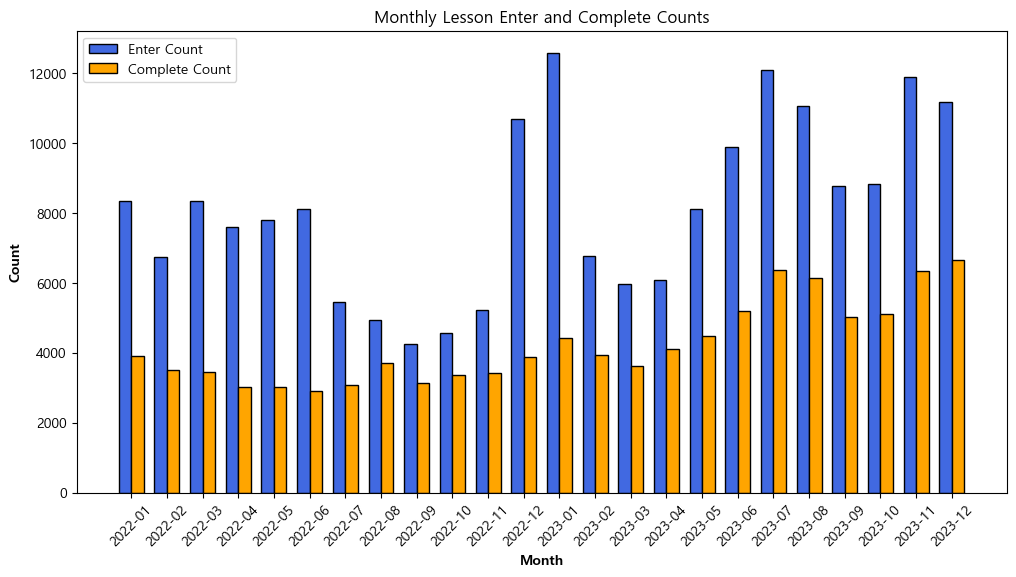

In [68]:
# 플롯그리기
fig, ax = plt.subplots(figsize=(12, 6))

# 바 넓이 설정
bar_width = 0.35

# Set the positions of the bars on the x-axis
r1 = range(len(merged_df['month']))
r2 = [x + bar_width for x in r1]

# 바 그리기
ax.bar(r1, merged_df['enter_count'], color='royalblue', width=bar_width, edgecolor='black', label='Enter Count')
ax.bar(r2, merged_df['complete_count'], color='orange', width=bar_width, edgecolor='black', label='Complete Count')

# 라벨 붙이기
ax.set_xlabel('Month', fontweight='bold')
ax.set_ylabel('Count', fontweight='bold')
ax.set_title('Monthly Lesson Enter and Complete Counts')
ax.set_xticks([r + bar_width/2 for r in range(len(merged_df['month']))])
ax.set_xticklabels(merged_df['month'], rotation=45)

# 레전드 붙이기
ax.legend()

# 그래프 그리기
plt.show()